<a href="https://colab.research.google.com/github/ChandanCoderck123/Flight-Delay-Prediction/blob/main/Flight_Delay_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import datetime, warnings, scipy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
flightsinfo = pd.read_csv("/content/flights.csv")

In [ ]:
list(flightsinfo.columns)

['YEAR',
 'MONTH',
 'DAY',
 'DAY_OF_WEEK',
 'AIRLINE',
 'FLIGHT_NUMBER',
 'TAIL_NUMBER',
 'ORIGIN_AIRPORT',
 'DESTINATION_AIRPORT',
 'SCHEDULED_DEPARTURE',
 'DEPARTURE_TIME',
 'DEPARTURE_DELAY',
 'TAXI_OUT',
 'WHEELS_OFF',
 'SCHEDULED_TIME',
 'ELAPSED_TIME',
 'AIR_TIME',
 'DISTANCE',
 'WHEELS_ON',
 'TAXI_IN',
 'SCHEDULED_ARRIVAL',
 'ARRIVAL_TIME',
 'ARRIVAL_DELAY',
 'DIVERTED',
 'CANCELLED',
 'CANCELLATION_REASON',
 'AIR_SYSTEM_DELAY',
 'SECURITY_DELAY',
 'AIRLINE_DELAY',
 'LATE_AIRCRAFT_DELAY',
 'WEATHER_DELAY']

In [ ]:
airport = pd.read_csv('/content/airports.csv')
airlines = pd.read_csv('/content/airlines.csv')

In [ ]:
flightsinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1983758 entries, 0 to 1983757
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  float64
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             float64
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    float64
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             float64
 24

In [7]:
flightsinfo.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,1983758.0,1.983758e+06,1.983758e+06,1.983758e+06,1.983758e+06,1.983757e+06,1.936626e+06,1.936626e+06,1.935587e+06,1.935587e+06,...,1.983757e+06,1.934104e+06,1.930502e+06,1.983757e+06,1.983757e+06,380084.000000,380084.000000,380084.000000,380084.000000,380084.000000
mean,2015.0,2.650308e+00,1.495894e+01,3.925219e+00,2.224604e+03,1.327997e+03,1.336093e+03,9.413398e+00,1.616063e+01,1.359066e+03,...,1.501559e+03,1.486991e+03,5.078065e+00,2.360672e-03,2.448485e-02,13.376783,0.059511,18.342306,22.406905,2.995141
std,0.0,1.215768e+00,8.869024e+00,1.988399e+00,1.784771e+03,4.774422e+02,4.889095e+02,3.669887e+01,9.225675e+00,4.896424e+02,...,4.974795e+02,5.161228e+02,3.920700e+01,4.852938e-02,1.545489e-01,26.358328,1.863997,46.452606,41.724152,21.153123
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-6.800000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,2.000000e+00,7.000000e+00,2.000000e+00,7.480000e+02,9.200000e+02,9.260000e+02,-5.000000e+00,1.100000e+01,9.400000e+02,...,1.116000e+03,1.108000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.0,3.000000e+00,1.500000e+01,4.000000e+00,1.700000e+03,1.324000e+03,1.331000e+03,-1.000000e+00,1.400000e+01,1.345000e+03,...,1.524000e+03,1.519000e+03,-4.000000e+00,0.000000e+00,0.000000e+00,3.000000,0.000000,2.000000,3.000000,0.000000
75%,2015.0,4.000000e+00,2.300000e+01,6.000000e+00,3.415000e+03,1.726000e+03,1.736000e+03,8.000000e+00,1.900000e+01,1.750000e+03,...,1.919000e+03,1.918000e+03,9.000000e+00,0.000000e+00,0.000000e+00,18.000000,0.000000,18.000000,28.000000,0.000000
max,2015.0,5.000000e+00,3.100000e+01,7.000000e+00,9.794000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1101.000000,241.000000,1971.000000,1313.000000,1152.000000


In [8]:
flightsinfo.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5.0,...,408.0,-22.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10.0,...,741.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20.0,...,811.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20.0,...,756.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25.0,...,259.0,-21.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
flightsinfo

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5.0,...,408.0,-22.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10.0,...,741.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20.0,...,811.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20.0,...,756.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25.0,...,259.0,-21.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983753,2015,5,6,3,UA,464,N845UA,ORD,PIT,2057.0,...,2311.0,-18.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1983754,2015,5,6,3,UA,1572,N39416,LAS,LAX,2057.0,...,2231.0,21.0,0.0,0.0,NaN,21.0,0.0,0.0,0.0,0.0
1983755,2015,5,6,3,UA,1574,N69835,IAH,LAS,2057.0,...,2208.0,-16.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1983756,2015,5,6,3,OO,5614,N133SY,ORD,BDL,2057.0,...,2359.0,-12.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
airlinecompanies = airlines.set_index('IATA_CODE')['AIRLINE'].to_dict()

In [11]:
airlinecompanies

{'UA': 'United Air Lines Inc.',
 'AA': 'American Airlines Inc.',
 'US': 'US Airways Inc.',
 'F9': 'Frontier Airlines Inc.',
 'B6': 'JetBlue Airways',
 'OO': 'Skywest Airlines Inc.',
 'AS': 'Alaska Airlines Inc.',
 'NK': 'Spirit Air Lines',
 'WN': 'Southwest Airlines Co.',
 'DL': 'Delta Air Lines Inc.',
 'EV': 'Atlantic Southeast Airlines',
 'HA': 'Hawaiian Airlines Inc.',
 'MQ': 'American Eagle Airlines Inc.',
 'VX': 'Virgin America'}

<ipython-input-12-d6dae4de5e44>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


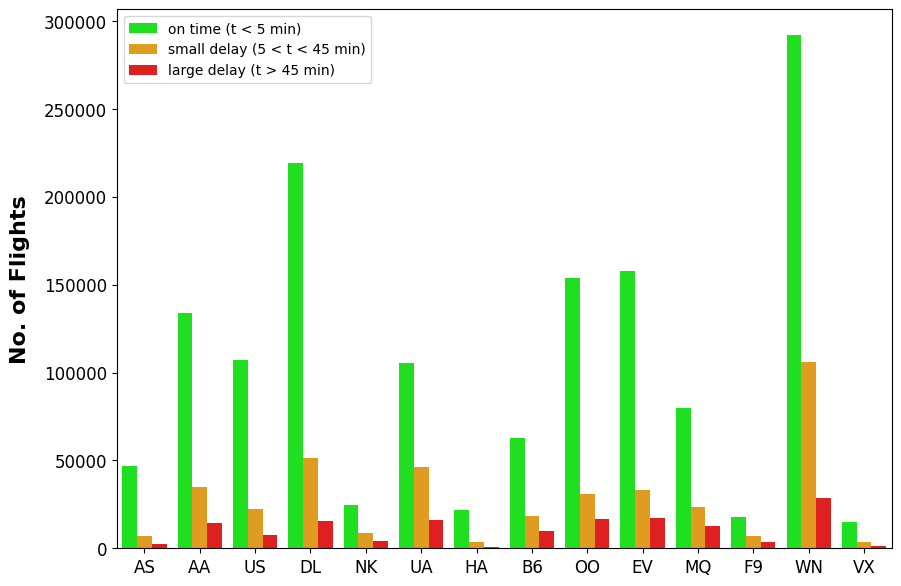

In [12]:
delay_type = lambda x:((0,1)[x > 5],2)[x > 45]
flightsinfo['DELAY_LEVEL'] = flightsinfo['DEPARTURE_DELAY'].apply(delay_type)

fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(x="AIRLINE", hue='DELAY_LEVEL', data=flightsinfo, palette= ["#00FF00","#FFA500","#FF0000"])

labels = ax.get_xticklabels()
ax.set_xticklabels(labels)
plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'normal', rotation = 0);
plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0);
ax.xaxis.label.set_visible(False)
plt.ylabel('No. of Flights', fontsize=16, weight = 'bold', labelpad=10)

L = plt.legend()
L.get_texts()[0].set_text('on time (t < 5 min)')
L.get_texts()[1].set_text('small delay (5 < t < 45 min)')
L.get_texts()[2].set_text('large delay (t > 45 min)')
plt.show()

<ipython-input-13-7e30b0452dc9>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x="AIRLINE", y="DEPARTURE_DELAY", data=flightsinfo, color="orange", ci=None)
<ipython-input-13-7e30b0452dc9>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x="AIRLINE",y="ARRIVAL_DELAY",  data=flightsinfo, color="b", hatch = 'X',
<ipython-input-13-7e30b0452dc9>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


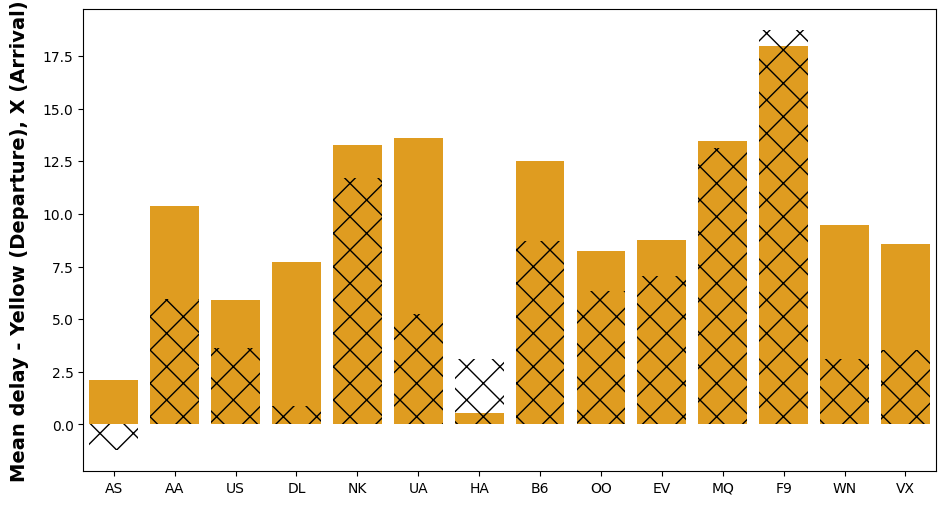

In [13]:
fig = plt.figure(1, figsize=(11,6))
ax = sns.barplot(x="AIRLINE", y="DEPARTURE_DELAY", data=flightsinfo, color="orange", ci=None)
ax = sns.barplot(x="AIRLINE",y="ARRIVAL_DELAY",  data=flightsinfo, color="b", hatch = 'X',
                 alpha = 0.0, ci=None)
labels = ax.get_xticklabels()
ax.set_xticklabels(labels)
ax.xaxis.label.set_visible(False)
plt.ylabel('Mean delay - Yellow (Departure), X (Arrival)',
           fontsize=14, weight = 'bold', labelpad=10);

In [23]:
airport.isnull().sum()

,0
IATA_CODE,0
AIRPORT,0
CITY,0
STATE,0
COUNTRY,0
LATITUDE,3
LONGITUDE,3


In [24]:
airport = airport.dropna(subset = ['LATITUDE','LONGITUDE'])

In [25]:
airport.head(10)

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
5,ACK,Nantucket Memorial Airport,Nantucket,MA,USA,41.25305,-70.06018
6,ACT,Waco Regional Airport,Waco,TX,USA,31.61129,-97.23052
7,ACV,Arcata Airport,Arcata/Eureka,CA,USA,40.97812,-124.10862
8,ACY,Atlantic City International Airport,Atlantic City,NJ,USA,39.45758,-74.57717
9,ADK,Adak Airport,Adak,AK,USA,51.87796,-176.64603


In [26]:
airlines

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [27]:
flightsinfo_NULL = flightsinfo.isnull().sum()*100/flightsinfo.shape[0]
flightsinfo_NULL

,0
YEAR,0.000000
MONTH,0.000000
DAY,0.000000
DAY_OF_WEEK,0.000000
AIRLINE,0.000000
FLIGHT_NUMBER,0.000000
TAIL_NUMBER,0.444863
ORIGIN_AIRPORT,0.000050
DESTINATION_AIRPORT,0.000050
SCHEDULED_DEPARTURE,0.000050


In [28]:
flightsinfo1 = flightsinfo.dropna(subset = ["TAIL_NUMBER",'DEPARTURE_TIME','DEPARTURE_DELAY','TAXI_OUT','WHEELS_OFF','SCHEDULED_TIME',
'ELAPSED_TIME','AIR_TIME','WHEELS_ON','TAXI_IN','ARRIVAL_TIME','ARRIVAL_DELAY'])

In [29]:
flightsinfo1.shape

(1930502, 32)

In [30]:
flightsinfo1.isnull().sum()

,0
YEAR,0
MONTH,0
DAY,0
DAY_OF_WEEK,0
AIRLINE,0
FLIGHT_NUMBER,0
TAIL_NUMBER,0
ORIGIN_AIRPORT,0
DESTINATION_AIRPORT,0
SCHEDULED_DEPARTURE,0


In [31]:
flightsinfo_modified = flightsinfo1.dropna(subset = ['AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY'])
flightsinfo_modified = flightsinfo_modified.drop(['YEAR','MONTH','DAY','DAY_OF_WEEK','TAIL_NUMBER','SCHEDULED_DEPARTURE','DEPARTURE_TIME','SCHEDULED_TIME',
                     'SCHEDULED_ARRIVAL','ARRIVAL_TIME','DIVERTED','CANCELLED','CANCELLATION_REASON','FLIGHT_NUMBER','WHEELS_OFF',
                     'WHEELS_ON','AIR_TIME'],axis = 1)

In [32]:
flightsinfo_modified.info()

<class 'pandas.core.frame.DataFrame'>
Index: 380084 entries, 27 to 1983754
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   AIRLINE              380084 non-null  object 
 1   ORIGIN_AIRPORT       380084 non-null  object 
 2   DESTINATION_AIRPORT  380084 non-null  object 
 3   DEPARTURE_DELAY      380084 non-null  float64
 4   TAXI_OUT             380084 non-null  float64
 5   ELAPSED_TIME         380084 non-null  float64
 6   DISTANCE             380084 non-null  float64
 7   TAXI_IN              380084 non-null  float64
 8   ARRIVAL_DELAY        380084 non-null  float64
 9   AIR_SYSTEM_DELAY     380084 non-null  float64
 10  SECURITY_DELAY       380084 non-null  float64
 11  AIRLINE_DELAY        380084 non-null  float64
 12  LATE_AIRCRAFT_DELAY  380084 non-null  float64
 13  WEATHER_DELAY        380084 non-null  float64
 14  DELAY_LEVEL          380084 non-null  int64  
dtypes: float64(11), int6

In [33]:
Flight_Delays = flightsinfo_modified

In [34]:
flightsinfo2 = flightsinfo1.drop(['CANCELLATION_REASON','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY',
                    'LATE_AIRCRAFT_DELAY','WEATHER_DELAY'],axis = 1)

In [35]:
flightsinfo2.isnull().sum()

,0
YEAR,0
MONTH,0
DAY,0
DAY_OF_WEEK,0
AIRLINE,0
FLIGHT_NUMBER,0
TAIL_NUMBER,0
ORIGIN_AIRPORT,0
DESTINATION_AIRPORT,0
SCHEDULED_DEPARTURE,0


In [36]:
flightsinfo2.shape

(1930502, 26)

In [37]:
flightsinfo2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1930502 entries, 0 to 1983756
Data columns (total 26 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  float64
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             float64
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    float64
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             float64
 24  CAN

In [38]:
flightsinfo2.DEPARTURE_TIME.dtype
flightsinfo2.DEPARTURE_TIME

,DEPARTURE_TIME
0,2354.0
1,2.0
2,18.0
3,15.0
4,24.0
...,...
1983752,2052.0
1983753,2050.0
1983754,2052.0
1983755,2059.0


The times are not in the correct format so i will transform them into HH:MM format

In [39]:
def CreateTimeFormatted(hours):
        if hours == 2400:
            hours = 0
        else:
            hours = "{0:04d}".format(int(hours))
            Hourmin = datetime.time(int(hours[0:2]), int(hours[2:4]))
            return Hourmin

In [40]:
flightsinfo2['Actual_Departure'] =flightsinfo1['DEPARTURE_TIME'].apply(CreateTimeFormatted)
flightsinfo2['Actual_Departure']

,Actual_Departure
0,23:54:00
1,00:02:00
2,00:18:00
3,00:15:00
4,00:24:00
...,...
1983752,20:52:00
1983753,20:50:00
1983754,20:52:00
1983755,20:59:00


In [41]:
flightsinfo2.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'DELAY_LEVEL',
       'Actual_Departure'],
      dtype='object')

Transform year month and day into date time format

In [42]:
flightsinfo2['Date'] = pd.to_datetime(flightsinfo2[['YEAR','MONTH','DAY']])
flightsinfo2.Date

,Date
0,2015-01-01
1,2015-01-01
2,2015-01-01
3,2015-01-01
4,2015-01-01
...,...
1983752,2015-05-06
1983753,2015-05-06
1983754,2015-05-06
1983755,2015-05-06


In [46]:
flightsinfo2['Actual_Departure'] =flightsinfo1['DEPARTURE_TIME'].apply(CreateTimeFormatted)
flightsinfo2['Scheduled_Arrival'] =flightsinfo1['SCHEDULED_ARRIVAL'].apply(CreateTimeFormatted)
flightsinfo2['Scheduled_Departure'] =flightsinfo1['SCHEDULED_DEPARTURE'].apply(CreateTimeFormatted)
flightsinfo2['Actual_Arrival'] =flightsinfo2['ARRIVAL_TIME'].apply(CreateTimeFormatted)

In [47]:
flightsinfo2 = flightsinfo2.merge(airlines, left_on='AIRLINE', right_on='IATA_CODE', how='inner')
flightsinfo2 = flightsinfo2.drop(['AIRLINE_x','IATA_CODE'], axis=1)
flightsinfo2 = flightsinfo2.rename(columns={"AIRLINE_y":"AIRLINE"})
flightsinfo2 = flightsinfo2.merge(airport, left_on='ORIGIN_AIRPORT', right_on='IATA_CODE', how='inner')
flightsinfo2 = flightsinfo2.merge(airport, left_on='DESTINATION_AIRPORT', right_on='IATA_CODE', how='inner')
flightsinfo2.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER', 'TAIL_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON',
       'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
       'DIVERTED', 'CANCELLED', 'DELAY_LEVEL', 'Actual_Departure', 'Date',
       'Scheduled_Arrival', 'Scheduled_Departure', 'Actual_Arrival', 'AIRLINE',
       'IATA_CODE_x', 'AIRPORT_x', 'CITY_x', 'STATE_x', 'COUNTRY_x',
       'LATITUDE_x', 'LONGITUDE_x', 'IATA_CODE_y', 'AIRPORT_y', 'CITY_y',
       'STATE_y', 'COUNTRY_y', 'LATITUDE_y', 'LONGITUDE_y'],
      dtype='object')

In [48]:
flightsinfo2 = flightsinfo2.drop(['LATITUDE_x', 'LONGITUDE_x',
       'STATE_y', 'COUNTRY_y', 'LATITUDE_y', 'LONGITUDE_y','STATE_x', 'COUNTRY_x'], axis=1)
flightsinfo2 = flightsinfo2.rename(columns={'IATA_CODE_x':'Org_Airport_Code','AIRPORT_x':'Org_Airport_Name','CITY_x':'Origin_city',
                             'IATA_CODE_y':'Dest_Airport_Code','AIRPORT_y':'Dest_Airport_Name','CITY_y':'Destination_city'})

In [49]:
flightsinfo2

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,Scheduled_Arrival,Scheduled_Departure,Actual_Arrival,AIRLINE,Org_Airport_Code,Org_Airport_Name,Origin_city,Dest_Airport_Code,Dest_Airport_Name,Destination_city
0,2015,1,1,4,98,N407AS,ANC,SEA,5.0,2354.0,...,04:30:00,00:05:00,04:08:00,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
1,2015,1,1,4,2336,N3KUAA,LAX,PBI,10.0,2.0,...,07:50:00,00:10:00,07:41:00,American Airlines Inc.,LAX,Los Angeles International Airport,Los Angeles,PBI,Palm Beach International Airport,West Palm Beach
2,2015,1,1,4,840,N171US,SFO,CLT,20.0,18.0,...,08:06:00,00:20:00,08:11:00,US Airways Inc.,SFO,San Francisco International Airport,San Francisco,CLT,Charlotte Douglas International Airport,Charlotte
3,2015,1,1,4,258,N3HYAA,LAX,MIA,20.0,15.0,...,08:05:00,00:20:00,07:56:00,American Airlines Inc.,LAX,Los Angeles International Airport,Los Angeles,MIA,Miami International Airport,Miami
4,2015,1,1,4,135,N527AS,SEA,ANC,25.0,24.0,...,03:20:00,00:25:00,02:59:00,Alaska Airlines Inc.,SEA,Seattle-Tacoma International Airport,Seattle,ANC,Ted Stevens Anchorage International Airport,Anchorage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1927428,2015,5,6,3,5568,N851AS,ATL,GSP,2056.0,2052.0,...,21:53:00,20:56:00,21:38:00,Atlantic Southeast Airlines,ATL,Hartsfield-Jackson Atlanta International Airport,Atlanta,GSP,Greenville-Spartanburg International Airport,Greer
1927429,2015,5,6,3,464,N845UA,ORD,PIT,2057.0,2050.0,...,23:29:00,20:57:00,23:11:00,United Air Lines Inc.,ORD,Chicago O'Hare International Airport,Chicago,PIT,Pittsburgh International Airport,Pittsburgh
1927430,2015,5,6,3,1572,N39416,LAS,LAX,2057.0,2052.0,...,22:10:00,20:57:00,22:31:00,United Air Lines Inc.,LAS,McCarran International Airport,Las Vegas,LAX,Los Angeles International Airport,Los Angeles
1927431,2015,5,6,3,1574,N69835,IAH,LAS,2057.0,2059.0,...,22:24:00,20:57:00,22:08:00,United Air Lines Inc.,IAH,George Bush Intercontinental Airport,Houston,LAS,McCarran International Airport,Las Vegas
